### Import libraries.

In [103]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import random
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns

import pybaseball as pb

### Add new columns.

In [51]:
df = pd.read_csv("C:/Users/chris/Documents/Datasets/BaseballR/2021/2021merged.csv", dtype={61:"str",151:"str",152:"str",153:"str",154:"str",155:"str",156:"str"})

In [3]:
df_scores_pre_post = df.groupby(['game_pk.x', 'inning_topbot', 'inning']).agg({'bat_score': 'first', 'post_bat_score': 'last'}).reset_index()
df_scores_pre_post.columns = ['game_pk.x', 'inning_topbot', 'inning', 'pre_inn_bat_score', 'post_inn_bat_score']

In [4]:
df_ABbyteam = df.groupby(['game_pk.x', 'inning_topbot', 'inning', 'atBatIndex']).agg({'matchup.batter.fullName': 'last'}).reset_index()
df_ABbyteam['AB_num_by_team'] = df_ABbyteam.groupby(['game_pk.x', 'inning_topbot']).cumcount()
df_ABbyteam['AB_num_by_team'] = df_ABbyteam['AB_num_by_team'] + 1
df_ABbyteam.drop(columns=['matchup.batter.fullName'], inplace=True)

In [5]:
df = pd.merge(left=df, right=df_scores_pre_post, left_on=['game_pk.x', 'inning_topbot', 'inning'], right_on=['game_pk.x', 'inning_topbot', 'inning'])
df = pd.merge(left=df, right=df_ABbyteam, left_on=['game_pk.x', 'inning_topbot', 'inning', 'atBatIndex'], right_on=['game_pk.x', 'inning_topbot', 'inning', 'atBatIndex'])
df['runs_scored_rest_of_inn'] = df['post_inn_bat_score'] - df['bat_score']

df['spot_in_order'] = df['AB_num_by_team'] % 9
df.loc[df['spot_in_order'] == 0, 'spot_in_order'] = 9

df['on_1b_tf'] = df['on_1b'].notnull()
df['on_2b_tf'] = df['on_2b'].notnull()
df['on_3b_tf'] = df['on_3b'].notnull()

df['batter'] = df['batter'].astype(int)
df['balls'] = df['balls'].astype(int)
df['strikes'] = df['strikes'].astype(int)
df['inning'] = df['inning'].astype(int)
df['at_bat_number'] = df['at_bat_number'].astype(int)
df['spot_in_order'] = df['spot_in_order'].astype(str)
df['home_score'] = df['home_score'].astype(int)
df['away_score'] = df['away_score'].astype(int)
df['runs_scored_rest_of_inn'] = df['runs_scored_rest_of_inn'].astype(int)

In [6]:
cols = ['game_pk.x', 'game_date.x', 'startTime', 'pitchNumber', 'details.description', 'balls', 'strikes',
        'count.outs.start', 'matchup.pitcher.fullName', 'matchup.batter.fullName', 'delta_home_win_exp', 'delta_run_exp', 
        'inning_topbot', 'inning', 'on_1b_tf', 'on_2b_tf', 'on_3b_tf', 'at_bat_number', 'spot_in_order', 'home_score', 'away_score',
        'runs_scored_rest_of_inn']

In [8]:
starters = df.groupby(['game_pk.x', 'inning_topbot']).agg({'matchup.pitcher.fullName': 'first'}).reset_index()
starters.columns = ['game_pk.x', 'inning_topbot', 'pitching_team_starter']

df2 = pd.merge(df, starters, left_on=['game_pk.x', 'inning_topbot'], right_on=['game_pk.x', 'inning_topbot'])
df2['isStartingPitcher'] = np.where(df2['pitching_team_starter'] == df2['matchup.pitcher.fullName'], 1, 0)

In [9]:
df2[cols+['pitching_team_starter', 'isStartingPitcher']]

game_pk.x game_date.x                 startTime  pitchNumber  \
0          632169  2021-04-10  2021-04-10T20:05:55.099Z            1   
1          632169  2021-04-10  2021-04-10T20:06:11.290Z            2   
2          632169  2021-04-10  2021-04-10T20:06:40.797Z            3   
3          632169  2021-04-10  2021-04-10T20:07:02.567Z            4   
4          632169  2021-04-10  2021-04-10T20:07:24.113Z            5   
...           ...         ...                       ...          ...   
709846     634656  2021-05-14  2021-05-14T21:37:24.635Z            2   
709847     634656  2021-05-14  2021-05-14T21:37:48.382Z            3   
709848     634656  2021-05-14  2021-05-14T21:38:24.301Z            4   
709849     634656  2021-05-14  2021-05-14T21:38:49.662Z            5   
709850     634656  2021-05-14  2021-05-14T21:39:16.178Z            6   

       details.description  balls  strikes  count.outs.start  \
0                     Ball      0        0                 0   
1                     Foul      1        0                 0   
2                 Foul Tip      1        1                 0   
3                     Ball      1        2                 0   
4                     Foul      2        2                 0   
...                    ...    ...      ...               ...   
709846       Called Strike      1        0                 2   
709847                Foul      1        1                 2   
709848                Ball      1        2                 2   
709849                Ball      2        2                 2   
709850     Swinging Strike      3        2                 2   

       matchup.pitcher.fullName matchup.batter.fullName  ...  on_1b_tf  \
0                    Logan Webb         Garrett Hampson  ...     False   
1                    Logan Webb         Garrett Hampson  ...     False   
2                    Logan Webb         Garrett Hampson  ...     False   
3                    Logan Webb         Garrett Hampson  ...     False   
4                    Logan Webb         Garrett Hampson  ...     False   
...                         ...                     ...  ...       ...   
709846            Josh Staumont            Tim Anderson  ...     False   
709847            Josh Staumont            Tim Anderson  ...     False   
709848            Josh Staumont            Tim Anderson  ...     False   
709849            Josh Staumont            Tim Anderson  ...     False   
709850            Josh Staumont            Tim Anderson  ...     False   

        on_2b_tf on_3b_tf  at_bat_number  spot_in_order  home_score  \
0          False    False              1              1           0   
1          False    False              1              1           0   
2          False    False              1              1           0   
3          False    False              1              1           0   
4          False    False              1              1           0   
...          ...      ...            ...            ...         ...   
709846     False    False             60              1           2   
709847     False    False             60              1           2   
709848     False    False             60              1           2   
709849     False    False             60              1           2   
709850     False    False             60              1           2   

        away_score  runs_scored_rest_of_inn pitching_team_starter  \
0                0                        0            Logan Webb   
1                0                        0            Logan Webb   
2                0                        0            Logan Webb   
3                0                        0            Logan Webb   
4                0                        0            Logan Webb   
...            ...                      ...                   ...   
709846           6                        0           Brad Keller   
709847           6                        0           Brad Keller   
709848     

### Per Pitch Success Metrics.

In [10]:
groupbydict = {
    'fielding_team': 'first',
    'game_date.y': 'last',
    'pitchNumber': 'count', 
    'at_bat_number': 'nunique', 
    'delta_home_win_exp': ['sum', 'mean'], 
    'delta_run_exp': ['sum', 'mean'], 
    'inning_topbot': 'last',
    'isStartingPitcher': 'last'
}

df1 = df2.groupby(['game_pk.x', 'matchup.pitcher.fullName']).agg(groupbydict).reset_index()
df1.columns = ['game_id', 'pitcher', 'team', 'game_date', 'pitch_count', 'batters_faced', 'total_delta_win_exp', 'delta_win_exp_per_pitch', 'total_delta_runs_exp', 'delta_runs_exp_per_pitch', 'home_away', 'isStartingPitcher']
df1['cum_delta_win_exp'] = np.where(df1.home_away == 'Bot', df1.total_delta_win_exp*-1, df1.total_delta_win_exp)
df1['delta_win_exp_per_pitch'] = np.where(df1.home_away == 'Bot', df1.delta_win_exp_per_pitch*-1, df1.delta_win_exp_per_pitch)
df1['home_away'] = np.where(df1.home_away == 'Bot', 'Away', 'Home')
df1.head(5)

game_id           pitcher                  team   game_date  pitch_count  \
0   632169        Ben Bowden      Colorado Rockies  2021-04-10           20   
1   632169     Caleb Baragar  San Francisco Giants  2021-04-10           18   
2   632169  Chi Chi Gonzalez      Colorado Rockies  2021-04-10           80   
3   632169        Jake McGee  San Francisco Giants  2021-04-10           16   
4   632169    Jhoulys Chacin      Colorado Rockies  2021-04-10           16   

   batters_faced  total_delta_win_exp  delta_win_exp_per_pitch  \
0              4                0.477                -0.023850   
1              3                0.037                 0.002056   
2             20               -0.147                 0.001837   
3              3                0.158                 0.009875   
4              4               -0.041                 0.002562   

   total_delta_runs_exp  delta_runs_exp_per_pitch home_away  \
0                 2.798                   0.13990      Away   
1                -0.117                  -0.00650      Home   
2                -0.752                  -0.00940      Away   
3                -0.508                  -0.03175      Home   
4                -0.508                  -0.03175      Away   

   isStartingPitcher  cum_delta_win_exp  
0                  0             -0.477  
1                  0              0.037  
2                  1              0.147  
3                  0              0.158  
4                  0              0.041

### Game-By-Game Hitting Stats.

In [11]:
groupbydict = {
    'batting_team': 'first',
    'batter': 'last',
    'game_date.y': 'last',
    'pitchNumber': 'count', 
    'at_bat_number': 'nunique', 
    'delta_home_win_exp': ['sum', 'mean'], 
    'delta_run_exp': ['sum', 'mean'], 
    'inning_topbot': 'last',
}

df1_hitters = df2.groupby(['matchup.batter.fullName', 'game_pk.x']).agg(groupbydict).reset_index()
df1_hitters.columns = ['batter', 'game_id', 'team', 'batter_id', 'game_date', 'pitch_count', 'plate_apps', 'total_delta_win_exp', 'delta_win_exp_per_pitch', 'total_delta_runs_exp', 'delta_runs_exp_per_pitch', 'home_away']
df1_hitters['total_delta_win_exp'] = np.where(df1_hitters.home_away == 'Bot', df1_hitters.total_delta_win_exp, df1_hitters.total_delta_win_exp*-1)
df1_hitters['delta_win_exp_per_pitch'] = np.where(df1_hitters.home_away == 'Bot', df1_hitters.delta_win_exp_per_pitch, df1_hitters.delta_win_exp_per_pitch*-1)
df1_hitters['home_away'] = np.where(df1_hitters.home_away == 'Bot', 'Home', 'Away')

In [12]:
df1_hitters.sort_values(by=['total_delta_runs_exp'], ascending=False)

batter  game_id                   team  batter_id   game_date  \
532        Adam Duvall   632211          Miami Marlins     594807  2021-04-13   
50229  Yasmani Grandal   632718      Chicago White Sox     518735  2021-08-27   
7852      Bryce Harper   633393  Philadelphia Phillies     547180  2021-07-06   
95          AJ Pollock   634282    Los Angeles Dodgers     572041  2021-05-02   
31418       Luis Urias   633016      Milwaukee Brewers     649966  2021-08-12   
...                ...      ...                    ...        ...         ...   
30038      Kyle Tucker   634521         Houston Astros     663656  2021-04-14   
30338    Leody Taveras   634630          Texas Rangers     665750  2021-04-01   
21322   Jarred Kelenic   632753       Seattle Mariners     672284  2021-08-27   
46231   Trevor Larnach   633588        Minnesota Twins     663616  2021-06-21   
24939    Jorge Polanco   632404        Minnesota Twins     593871  2021-09-21   

       pitch_count  plate_apps  total_delta_win_exp  delta_win_exp_per_pitch  \
532             13           5                0.384                 0.029538   
50229           24           6                0.201                 0.008375   
7852            11           6                0.139                 0.012636   
95              16           6                0.252                 0.015750   
31418           22           6                0.097                 0.004409   
...            ...         ...                  ...                      ...   
30038           14           5               -0.861                -0.061500   
30338           20           5               -0.218                -0.010900   
21322           28           6               -1.058                -0.037786   
46231           27           6               -0.280                -0.010370   
24939           27           6               -0.060                -0.002222   

       total_delta_runs_exp  delta_runs_exp_per_pitch home_away  
532                   6.320                  0.486154      Away  
50229                 6.239                  0.259958      Home  
7852                  6.192                  0.562909      Away  
95                    6.168                  0.385500      Away  
31418                 6.052                  0.275091      Away  
...                     ...                       ...       ...  
30038                -2.635                 -0.188214      Home  
30338                -2.718                 -0.135900      Away  
21322                -2.789                 -0.099607      Home  
46231                -2.805                 -0.103889      Home  
24939                -2.871                 -0.106333      Away  

[51468 rows x 12 columns]

### Per-PA Hitting Stats.

In [13]:
groupbydict = {
    'batting_team': 'first',
    'fielding_team': 'first',
    'batter': 'last',
    'game_date.y': 'last',
    'startTime': 'first',
    'pitchNumber': 'count', 
    'delta_home_win_exp': 'last', 
    'delta_run_exp': 'sum', 
    'inning_topbot': 'last',
    'des': 'last',
    'count.balls.end': 'last',
    'count.strikes.end': 'last',
    'count.outs.start': 'last',
    'about.inning': 'last',
    'bat_score': 'last',
    'fld_score': 'last',
    'home_team.y': 'last',
    'away_team.y': 'last',
    'result.event': 'last',
    'hitData.trajectory': 'last'
}

df3_hitters = df2.groupby(['matchup.batter.fullName', 'game_pk.x', 'at_bat_number']).agg(groupbydict).reset_index()
df3_hitters.columns = ['batter', 'game_id', 'PA_of_game', 'team', 'opp', 'batter_id', 'game_date', 'time', 'pitch_count', 'delta_win_exp', 
                       'delta_runs_exp', 'home_away', 'desc', 'balls', 'strikes', 'outs', 'inning','bat_score', 'field_score', 'home_team', 
                       'away_team', 'result', 'trajectory']
df3_hitters['delta_win_exp'] = np.where(df3_hitters.home_away == 'Bot', df3_hitters.delta_win_exp, df3_hitters.delta_win_exp*-1)
df3_hitters['inning'] = df3_hitters.home_away + ' ' + df3_hitters.inning.astype('string')
df3_hitters['count'] = df3_hitters.balls.astype('string') + '-' + df3_hitters.strikes.astype('string')
df3_hitters['bat_score'] = round(df3_hitters['bat_score'].astype('int'), 0)
df3_hitters['field_score'] = round(df3_hitters['field_score'].astype('int'), 0)
df3_hitters['score'] = df3_hitters.bat_score.astype('string') + '-' + df3_hitters.field_score.astype('string')
df3_hitters['bat_code'] = np.where(df3_hitters.home_away == 'Bot', df3_hitters.home_team, df3_hitters.away_team)
df3_hitters['field_code'] = np.where(df3_hitters.home_away == 'Bot', df3_hitters.away_team, df3_hitters.home_team)
df3_hitters['home_away'] = np.where(df3_hitters.home_away == 'Bot', 'Home', 'Away')
df3_hitters['PA_num'] = df3_hitters.sort_values(by=['time'], ascending=True).groupby(['batter_id']).cumcount()
df3_hitters['PA_num'] = df3_hitters['PA_num'] + 1
df3_hitters['cum_win_exp_added'] = df3_hitters.sort_values(by=['time'], ascending=True).groupby(['batter_id'])['delta_win_exp'].cumsum()
df3_hitters['cum_runs_exp_added'] = df3_hitters.sort_values(by=['time'], ascending=True).groupby(['batter_id'])['delta_runs_exp'].cumsum()

df3_hitters['result_cat'] = df3_hitters['result']
df3_hitters['result_cat'] = np.where(df3_hitters.result_cat == 'Intent Walk', 'Walk', df3_hitters.result_cat)
df3_hitters['result_cat'] = np.where(df3_hitters.result_cat == 'Strikeout Double Play', 'Strikeout', df3_hitters.result_cat)
df3_hitters['result_cat'] = np.where(df3_hitters.result_cat == 'Batter Out', 'Strikeout', df3_hitters.result_cat)
df3_hitters['result_cat'] = np.where(df3_hitters.result_cat == 'Field Out', 'Strikeout', df3_hitters.result_cat)
df3_hitters['result_cat'] = np.where(df3_hitters.result_cat == 'Sac Fly', 'Sacrifice', df3_hitters.result_cat)
df3_hitters['result_cat'] = np.where(df3_hitters.result_cat == 'Sac Bunt', 'Sacrifice', df3_hitters.result_cat)

results1 = ['Strikeout', 'Groundout', 'Flyout', 'Lineout', 'Pop Out', 'Forceout', 'Grounded Into DP', 'Field Error', 'Fielders Choice', 
            'Double Play', 'Fielders Choice Out', 'Bunt Groundout', 'Strikeout Double Play', 'Bunt Pop Out', 'Sac Fly Double Play', 
            'Bunt Lineout', 'Triple Play', 'Field Out', 'Sac Bunt Double Play', 'Batter Out']
results2 = ['Single', 'Walk', 'Double', 'Home Run', 'Hit By Pitch', 'Sac Fly', 'Sac Bunt', 'Triple', 'Intent Walk']

df3_hitters['result_cat'] = np.where((df3_hitters.result_cat.isin(results1) & (df3_hitters.trajectory == 'ground_ball')), 'Groundout', df3_hitters.result_cat)
df3_hitters['result_cat'] = np.where((df3_hitters.result_cat.isin(results1) & (df3_hitters.trajectory == 'fly_ball')), 'Flyout', df3_hitters.result_cat)
df3_hitters['result_cat'] = np.where((df3_hitters.result_cat.isin(results1) & (df3_hitters.trajectory == 'line_drive')), 'Lineout', df3_hitters.result_cat)
df3_hitters['result_cat'] = np.where((df3_hitters.result_cat.isin(results1) & (df3_hitters.trajectory == 'popup')), 'Pop Out', df3_hitters.result_cat)
df3_hitters['result_cat'] = np.where((df3_hitters.result_cat.isin(results1) & (df3_hitters.trajectory == 'bunt_grounder')), 'Groundout', df3_hitters.result_cat)
df3_hitters['result_cat'] = np.where((df3_hitters.result_cat.isin(results1) & (df3_hitters.trajectory == 'bunt_popup')), 'Pop Out', df3_hitters.result_cat)
df3_hitters['result_cat'] = np.where((df3_hitters.result_cat.isin(results1) & (df3_hitters.trajectory == 'bunt_line_drive')), 'Lineout', df3_hitters.result_cat)

df3_hitters = df3_hitters[df3_hitters['result'].isin(results1+results2)]

In [104]:
df3_hitters.sort_values(by=['delta_win_exp'], ascending=False).head(5)

batter  game_id  PA_of_game                   team  \
111893    Luke Williams   633764          69  Philadelphia Phillies   
145923  Robbie Grossman   633961          80         Detroit Tigers   
135729     Ozzie Albies   632923          95         Atlanta Braves   
87439      Jorge Alfaro   634450          93          Miami Marlins   
71192   Jacob Stallings   633290          83     Pittsburgh Pirates   

                         opp  batter_id   game_date                      time  \
111893        Atlanta Braves     663897  2021-06-09  2021-06-10T01:57:41.868Z   
145923      New York Yankees     543257  2021-05-28  2021-05-29T02:41:24.607Z   
135729       Cincinnati Reds     645277  2021-08-11  2021-08-12T03:19:32.950Z   
87439   San Francisco Giants     595751  2021-04-17  2021-04-18T02:06:02.250Z   
71192          New York Mets     607732  2021-07-17  2021-07-18T02:56:18.879Z   

        pitch_count  delta_win_exp  ...    result  trajectory count  score  \
111893            2          0.904  ...  Home Run  line_drive   0-1    0-1   
145923            6          0.840  ...  Home Run    fly_ball   3-2    1-2   
135729            4          0.831  ...  Home Run    fly_ball   2-1    5-6   
87439             2          0.831  ...    Double  line_drive   1-0    5-6   
71192             1          0.830  ...  Home Run    fly_ball   0-0    5-7   

        bat_code  field_code PA_num  cum_win_exp_added  cum_runs_exp_added  \
111893       PHI         ATL      5              0.986               1.704   
145923       DET         NYY    220              1.747               9.994   
135729       ATL         CIN    486              1.396              15.152   
87439        MIA          SF     33              0.375              -3.891   
71192        PIT         NYM    255              2.538               8.294   

       result_cat  
111893   Home Run  
145923   Home Run  
135729   Home Run  
87439      Double  
71192    Home Run  

[5 rows x 31 columns]

### Season-Long Hitting Stats.

In [16]:
groupbydict = {
    'team': 'first',
    'batter_id': 'last',
    'pitch_count': 'sum', 
    'PA_of_game': 'count', 
    'delta_win_exp': 'sum',
    'delta_runs_exp': 'sum',
}

df2_hitters = df3_hitters.groupby(['batter']).agg(groupbydict).reset_index()
df2_hitters.columns = ['batter', 'team', 'batter_id', 'pitch_count', 'plate_apps', 'total_delta_win_exp', 'total_delta_runs_exp']
df2_hitters['delta_win_exp_per_pa'] = df2_hitters['total_delta_win_exp']/df2_hitters['plate_apps']
df2_hitters['delta_runs_exp_per_pa'] = df2_hitters['total_delta_runs_exp']/df2_hitters['plate_apps']

In [17]:
df2_hitters[df2_hitters.batter == 'Mitch Haniger']
#df2_hitters.sort_values(by=['total_delta_runs_exp'], ascending=False)

batter              team  batter_id  pitch_count  plate_apps  \
716  Mitch Haniger  Seattle Mariners     571745         2768         689   

     total_delta_win_exp  total_delta_runs_exp  delta_win_exp_per_pa  \
716                2.656                 26.98              0.003855   

     delta_runs_exp_per_pa  
716               0.039158

### Create Leaguewide Cumulative xRA Scatterplot.

In [18]:
batter_ids = df3_hitters.batter_id.unique().tolist()
batter = 'Mitch Haniger'

fig = go.Figure()
for i in batter_ids:
    fig.add_trace(go.Scatter(x=df3_hitters[df3_hitters.batter_id == i].sort_values(by=['PA_num'], ascending=True).PA_num,
                             y=df3_hitters[df3_hitters.batter_id == i].sort_values(by=['PA_num'], ascending=True).cum_runs_exp_added, 
                             line=dict(color='lightgray', width=2),
                             mode='lines'))
fig.add_trace(go.Scatter(x=df3_hitters[df3_hitters.batter == batter].sort_values(by=['PA_num'], ascending=True).PA_num,
                         y=df3_hitters[df3_hitters.batter == batter].sort_values(by=['PA_num'], ascending=True).cum_runs_exp_added, 
                         line=dict(color='royalblue', width=4),
                         mode='lines'))
fig.add_trace(go.Scatter(x=[df3_hitters[df3_hitters.batter == batter].sort_values(by=['PA_num'], ascending=True)['PA_num'].iloc[-1]],
                         y=[df3_hitters[df3_hitters.batter == batter].sort_values(by=['PA_num'], ascending=True)['cum_runs_exp_added'].iloc[-1]], 
                         line=dict(color='royalblue', width=4),
                         mode='lines+markers+text',
                         marker=dict(size=54, line=dict(width=4, color='black')),
                         text=round(df3_hitters[df3_hitters.batter == batter].sort_values(by=['PA_num'], ascending=True)['cum_runs_exp_added'].iloc[-1], 1),
                         textposition='middle center',
                         textfont=dict(size=18, color='white')))
fig.update_layout(title_text=f'Cumulative Expected Runs Added',
                  title_font_size=25,
                  title_x=0.5,
                  title_y=0.92,
                  xaxis_title='Plate Appearances',
                  #yaxis_title='Expected Runs Added',
                  xaxis=dict(tickmode='linear', tick0=0, dtick=100, showgrid=False, zeroline=False, title_font=dict(size=18)),
                  yaxis=dict(tickmode='linear', tick0=0, dtick=10, showgrid=False, zeroline=False, title_font=dict(size=18)),
                  font=dict(size=18, color='black'),
                  showlegend=False,
                  width=1200,
                  height=650)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True, ticks='outside', tickson='labels', ticklen=5, tickwidth=2, fixedrange=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True, ticks='outside', tickson='labels', ticklen=5, tickwidth=2, fixedrange=True)
fig.show()

### Create Individual Cumulative xRA Scatterplot.

In [19]:
batter = 'Mitch Haniger'
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=df3_hitters[df3_hitters.batter == batter].sort_values(by=['PA_num'], ascending=True).PA_num,
                          y=df3_hitters[df3_hitters.batter == batter].sort_values(by=['PA_num'], ascending=True).cum_runs_exp_added, 
                          line=dict(color='royalblue', width=5),
                          mode='lines'))
fig1.add_trace(go.Scatter(x=[df3_hitters[df3_hitters.batter == batter].sort_values(by=['PA_num'], ascending=True)['PA_num'].iloc[-1]],
                          y=[df3_hitters[df3_hitters.batter == batter].sort_values(by=['PA_num'], ascending=True)['cum_runs_exp_added'].iloc[-1]], 
                          line=dict(color='royalblue', width=4),
                          mode='lines+markers+text',
                          marker=dict(size=54, line=dict(width=4, color='black')),
                          text=round(df3_hitters[df3_hitters.batter == batter].sort_values(by=['PA_num'], ascending=True)['cum_runs_exp_added'].iloc[-1], 1),
                          textposition='middle center',
                          textfont=dict(size=18, color='white')))
fig1.update_layout(title_text=f'Cumulative Expected Runs Added',
                   title_font_size=25,
                   title_x=0.5,
                   title_y=0.92,
                   xaxis_title='Plate Appearances',
                   xaxis=dict(tickmode='linear', tick0=0, dtick=100, showgrid=False, zeroline=False, title_font=dict(size=18)),
                   yaxis=dict(tickmode='linear', tick0=0, dtick=5, showgrid=False, zeroline=False, title_font=dict(size=18)),
                   font=dict(size=18, color='black'),
                   showlegend=False,
                   width=1200,
                   height=650)
fig1.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True, ticks='outside', tickson='labels', ticklen=5, tickwidth=2, fixedrange=True)
fig1.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True, ticks='outside', tickson='labels', ticklen=5, tickwidth=2, fixedrange=True)
fig1.show()

### Create Table of Top Plays by Added Win Expectancy.

In [20]:
batter = 'Mitch Haniger'
top_plays_cols = ['game_date', 'field_code', 'score', 'inning', 'count', 'desc', 'delta_win_exp']
df_top_plays = df3_hitters[df3_hitters.batter == batter].sort_values(by=['delta_win_exp'], ascending=False)[top_plays_cols].head(5)
df_top_plays['desc'] = df_top_plays['desc'].str.split('.', expand=True)[0]
df_top_plays['desc'] = df_top_plays['desc'] + '.'
df_top_plays['delta_win_exp'] = round(df_top_plays['delta_win_exp']*100,1).astype('string') + '%'

fig2 = go.Figure(data=[go.Table(columnwidth=[80, 80, 50, 60, 50, 300, 120],
                                header=dict(values=['<b>Date', '<b>Opponent', '<b>Score', '<b>Inning', '<b>Count', '<b>Description', '<b>Win Exp. Added'], 
                                            align='center',
                                            line=dict(color='black', width=2),
                                            fill_color='royalblue',
                                            font=dict(color='white', size=16),
                                            height=40),
                                cells=dict(values=[df_top_plays['game_date']+'<br>', df_top_plays['field_code']+'<br>', df_top_plays['score']+'<br>', 
                                                   df_top_plays['inning']+'<br>', df_top_plays['count']+'<br>', df_top_plays['desc'], 
                                                   '<b>'+df_top_plays['delta_win_exp']], 
                                           align=['center', 'center', 'center', 'center', 'center', 'left', 'center'],
                                           fill_color='aliceblue',
                                           line_color='aliceblue',
                                           height=30))])

fig2.update_layout(title_text=f'Top Plays by Win Expectancy Added',
                   title_font_size=25,
                   title_x=0.5,
                   title_y=0.92,
                   xaxis=dict(tickmode='linear', tick0=0, dtick=100, showgrid=False, zeroline=False, title_font=dict(size=18)),
                   yaxis=dict(tickmode='linear', tick0=0, dtick=5, showgrid=False, zeroline=False, title_font=dict(size=18)),
                   font=dict(size=14, color='black'),
                   showlegend=False,
                   width=1200,
                   height=450)

fig2.show()                

### Create Distribution Plot Showing xRA/PA Compared to MLB.

In [21]:
batter = 'Mitch Haniger'
cutoff = 150

data = df2_hitters[df2_hitters.plate_apps >= cutoff].sort_values(by=['delta_runs_exp_per_pa']).reset_index(drop=True)
range_vals = [df2_hitters[df2_hitters.plate_apps >= cutoff]['delta_runs_exp_per_pa'].min(), df2_hitters[df2_hitters.plate_apps >= cutoff]['delta_runs_exp_per_pa'].max()]

value = data.loc[data['batter'] == batter, 'delta_runs_exp_per_pa'].iat[0]
percentile = data['batter'].to_list().index(batter)/len(data['batter'].to_list())

fig3 = ff.create_distplot(hist_data=[data['delta_runs_exp_per_pa']], 
                          group_labels=['delta_runs_exp_per_pa'], 
                          bin_size=[0.005],
                          show_hist=False,
                          show_rug=False)

x_kde = fig3.data[0].x
y_kde = fig3.data[0].y
x1   = [i for i in fig3.data[0].x if i < value]
y1   = fig3.data[0].y[:len(x1)]

fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=x_kde,
                          y=y_kde, 
                          line=dict(color='royalblue', width=5),
                          fill='tozeroy',
                          mode='none',
                          fillcolor='lightgrey'))

fig3.add_trace(go.Scatter(x=x1,
                          y=y1, 
                          line=dict(color='royalblue', width=5),
                          fill='tozeroy',
                          mode='none',
                          fillcolor='royalblue'))

fig3.add_trace(go.Scatter(x=x_kde,
                          y=y_kde, 
                          line=dict(color='black', width=2),
                          mode='lines'))

fig3.update_layout(title_text=f'Expected Runs Added/PA Rank vs. MLB<br><sup>Minimum 150 PA</sup>',
                   title_font_size=25,
                   title_x=0.5,
                   title_y=0.92,
                   xaxis=dict(tickmode='linear', dtick=0.05, range=range_vals, showgrid=False, zeroline=False, title_font=dict(size=18)),
                   yaxis=dict(tickmode='linear', dtick=2, showgrid=False, zeroline=False, title_font=dict(size=18), showticklabels=False),
                   font=dict(size=18, color='black'),
                   showlegend=False,
                   width=1200,
                   height=650)

fig3.add_annotation(text=f'xRA/PA: {round(value,4)}<br><br>{round(percentile*100,1)} Percentile', 
                    showarrow=False, 
                    xref='paper', yref='paper', 
                    x=0.1, y=0.7, align='center', 
                    bgcolor='white', 
                    bordercolor='black',
                    borderpad=5,
                    borderwidth=2)

fig3.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True, ticks='outside', tickson='labels', ticklen=5, tickwidth=2, fixedrange=True)
fig3.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True, fixedrange=True)
fig3.show()

In [22]:
def get_percentile(row, result_dict):
    if row['result'] in ['Strikeout', 'Groundout', 'Lineout', 'Pop Out', 'Flyout']:
        return 1 - result_dict[row['result']].index(row['rate'])/len(result_dict[row['result']])
    return result_dict[row['result']].index(row['rate'])/len(result_dict[row['result']])

batter = 'Mitch Haniger'
cutoff = 150
batter_ids = df2_hitters[df2_hitters.plate_apps >= cutoff].batter_id.unique().tolist()
results = df3_hitters.result_cat.unique().tolist()
groupbydict = {
    'batter_id': 'last',
    'delta_runs_exp': 'sum',
    'time': 'count'
}
data = pd.DataFrame()

for i in batter_ids:
    df = df3_hitters[df3_hitters.batter_id == i].groupby(['result_cat']).agg(groupbydict).reset_index()
    df.columns = ['result', 'batter_id', 'total_runs_exp', 'total_PA']
    df['runs_per_PA'] = df['total_runs_exp']/df['total_PA']
    for result in results:
        if result not in df.result.to_list():
            df.loc[len(df.index)] = [result, i, 0.0, 0,0.000]
    df['rate'] = round(df['total_PA']/df['total_PA'].sum(),3)
    df['runs_per_PA'] = round(df['runs_per_PA'],3)
    data = data.append(df)

data['total_runs_exp'] = round(data['total_runs_exp'],1)
data['color'] = np.where(data['total_runs_exp'] >= 0, 'royalblue', 'darkred')
data = data.reset_index(drop=True)
data = pd.merge(data, df2_hitters[['batter', 'batter_id']], on=['batter_id'])

result_dict = {}
for i in results:
    result_dict[i] = data[data.result == i]['rate'].sort_values(ascending=True).reset_index(drop=True).to_list()

data['rate_percentile'] = data.apply(lambda row: get_percentile(row, result_dict), axis=1)
data

result  batter_id  total_runs_exp  total_PA  runs_per_PA   rate  \
0           Double     572041            21.4        27        0.793  0.064   
1           Flyout     572041           -13.0        57       -0.229  0.136   
2        Groundout     572041           -22.7        86       -0.264  0.205   
3     Hit By Pitch     572041             2.4         6        0.405  0.014   
4         Home Run     572041            29.5        21        1.403  0.050   
...            ...        ...             ...       ...          ...    ...   
4915        Single     670097             4.1        12        0.341  0.065   
4916     Strikeout     670097           -15.2        59       -0.257  0.321   
4917          Walk     670097             8.4        22        0.383  0.120   
4918  Hit By Pitch     670097             0.0         0        0.000  0.000   
4919        Triple     670097             0.0         0        0.000  0.000   

          color      batter  rate_percentile  
0     royalblue  AJ Pollock         0.943902  
1       darkred  AJ Pollock         0.304878  
2       darkred  AJ Pollock         0.602439  
3     royalblue  AJ Pollock         0.663415  
4     royalblue  AJ Pollock         0.831707  
...         ...         ...              ...  
4915  royalblue  Zack Short         0.004878  
4916    darkred  Zack Short         0.078049  
4917  royalblue  Zack Short         0.865854  
4918  royalblue  Zack Short         0.000000  
4919  royalblue  Zack Short         0.000000  

[4920 rows x 9 columns]

### Bar Chart Showing Total xRA by PA Outcome.

In [23]:
batter = 'Mitch Haniger'
bar_data = data[data.batter == batter].sort_values(by='total_runs_exp', ascending=False).reset_index(drop=True)

fig4 = go.Figure(go.Bar(x=bar_data.result, 
                        y=bar_data.total_runs_exp,
                        text=abs(bar_data.total_runs_exp),
                        textposition='auto'))

fig4.update_layout(title_text=f'Total Delta Expected Runs by PA Outcome',
                   title_font_size=25,
                   title_x=0.5,
                   title_y=0.92,
                   xaxis=dict(tickmode='linear', showgrid=False, zeroline=False, title_font=dict(size=18)),
                   yaxis=dict(tickmode='linear', showgrid=False, zeroline=False, title_font=dict(size=18), showticklabels=False),
                   font=dict(size=18, color='black'),
                   showlegend=False,
                   width=1200,
                   height=650)

fig4.update_traces(marker_color=bar_data['color'], 
                   marker_line_color='black',
                   marker_line_width=2, 
                   opacity=1)

fig4.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True, ticks='outside', tickson='labels', ticklen=5, tickwidth=2, fixedrange=True)
fig4.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True, fixedrange=True)
fig4.show()


### Polar Chart Showing Percentiles vs MLB for Each PA Outcome.

In [28]:
batter = 'Mitch Haniger'
ordered_results = ['Single', 'Double', 'Triple', 'Home Run', 'Walk', 'Hit By Pitch']
polar_data = pd.DataFrame()
for i in ordered_results:
    polar_data = polar_data.append(data[(data.batter == batter) & (data.result == i)][['result', 'rate_percentile']])
polar_data['rate_percentile'] = round(polar_data['rate_percentile']*100,0).astype('int')

fig5 = go.Figure()

fig5.add_trace(go.Barpolar(r=polar_data.rate_percentile.to_list(),
                           width=[60,60,60,60,60,60],
                           theta0=0,
                           dtheta=60,
                           marker_color='royalblue',
                           marker_line_color="white",
                           marker_line_width=2,
                           marker_opacity=1))

fig5.add_trace(go.Barpolar(r=[100,100,100,100,100,100],
                           width=[60,60,60,60,60,60],
                           theta0=0,
                           dtheta=60,
                           marker_color='lightgrey',
                           marker_line_color="white",
                           marker_line_width=2,
                           marker_opacity=1))

fig5.update_layout(template=None,
                   polar=dict(radialaxis=dict(range=[0, 100], showticklabels=False, ticks=''),
                              angularaxis=dict(showticklabels=True, ticks='outside')),
                   showlegend=False,
                   polar_radialaxis_showgrid=False,
                   polar_radialaxis_showline=False,
                   polar_angularaxis_showgrid=False,
                   polar_angularaxis_linewidth=2,
                   polar_angularaxis_linecolor='black',
                   polar_angularaxis_tickcolor='black',
                   polar_angularaxis_tickwidth=2,
                   polar_angularaxis_ticktext=ordered_results,
                   polar_angularaxis_tickvals=[0,60,120,180,240,300],
                   polar_angularaxis_tickmode='array',
                   title='PA Outcome Rates - Reached Base<br><sub>Percentile Rankings vs. MLB</sub>',
                   title_font_size=25,
                   title_x=0.5,
                   title_y=0.95,
                   font=dict(size=18, color='black'),
                   dragmode=False,
                   width=700,
                   height=650)

annot_coords = [(0.85, 0.5), (0.725, 0.875), (0.275, 0.875), (0.15, 0.5), (0.275, 0.125), (0.725, 0.125)]
for i in range(len(annot_coords)):
    fig5.add_annotation(text=f'{polar_data.rate_percentile.to_list()[i]}%', 
                        showarrow=False, 
                        xref='paper', yref='paper', 
                        x=annot_coords[i][0], y=annot_coords[i][1], align='center', 
                        bgcolor='white', 
                        bordercolor='black',
                        borderpad=4,
                        borderwidth=2)

fig5.show()

In [29]:
batter = 'Mitch Haniger'
ordered_results = ['Strikeout', 'Groundout', 'Flyout', 'Pop Out', 'Lineout', 'Sacrifice']
polar_data = pd.DataFrame()
for i in ordered_results:
    polar_data = polar_data.append(data[(data.batter == batter) & (data.result == i)][['result', 'rate_percentile']])
polar_data['rate_percentile'] = round(polar_data['rate_percentile']*100,0).astype('int')

fig6 = go.Figure()

fig6.add_trace(go.Barpolar(r=polar_data.rate_percentile.to_list(),
                           width=[60,60,60,60,60,60],
                           theta0=0,
                           dtheta=60,
                           marker_color='darkred',
                           marker_line_color="white",
                           marker_line_width=2,
                           marker_opacity=1))

fig6.add_trace(go.Barpolar(r=[100,100,100,100,100,100],
                           width=[60,60,60,60,60,60],
                           theta0=0,
                           dtheta=60,
                           marker_color='lightgrey',
                           marker_line_color="white",
                           marker_line_width=2,
                           marker_opacity=1))

fig6.update_layout(template=None,
                   polar=dict(radialaxis=dict(range=[0, 100], showticklabels=False, ticks=''),
                              angularaxis=dict(showticklabels=True, ticks='outside')),
                   showlegend=False,
                   polar_radialaxis_showgrid=False,
                   polar_radialaxis_showline=False,
                   polar_angularaxis_showgrid=False,
                   polar_angularaxis_linewidth=2,
                   polar_angularaxis_linecolor='black',
                   polar_angularaxis_tickcolor='black',
                   polar_angularaxis_tickwidth=2,
                   polar_angularaxis_ticktext=ordered_results,
                   polar_angularaxis_tickvals=[0,60,120,180,240,300],
                   polar_angularaxis_tickmode='array',
                   title='PA Outcome Rates - Outs<br><sub>Percentile Rankings vs. MLB</sub>',
                   title_font_size=25,
                   title_x=0.5,
                   title_y=0.95,
                   font=dict(size=18, color='black'),
                   dragmode=False,
                   width=700,
                   height=650)

annot_coords = [(0.85, 0.5), (0.725, 0.875), (0.275, 0.875), (0.15, 0.5), (0.275, 0.125), (0.725, 0.125)]
for i in range(len(annot_coords)):
    fig6.add_annotation(text=f'{polar_data.rate_percentile.to_list()[i]}%', 
                        showarrow=False, 
                        xref='paper', yref='paper', 
                        x=annot_coords[i][0], y=annot_coords[i][1], align='center', 
                        bgcolor='white', 
                        bordercolor='black',
                        borderpad=4,
                        borderwidth=2)


fig6.show()

Gathering Player Data


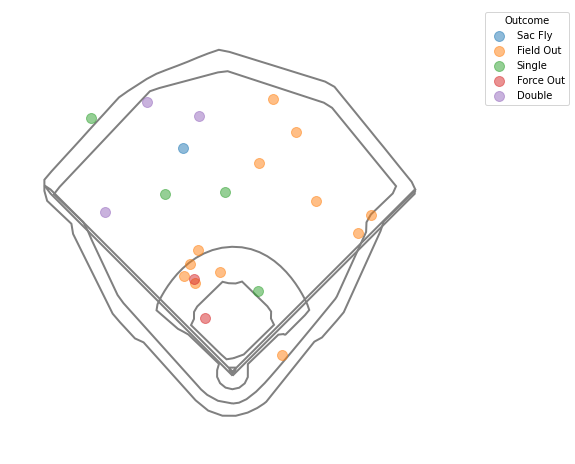

<Axes:>

In [45]:
pb.spraychart(pb.statcast_batter(start_dt='2022-09-01', end_dt='2022-09-08', player_id=571745), 'Mariners')